Authors: Michael Gamston

### This Jupyter Notebook file runs a deicison tree algorithm for classifcation of iris data.

In [92]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [82]:
iris_df=pd.read_csv('iris_data/iris.data', index_col=False, names=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'])
iris_df.head()
#1. sepal length in cm
#2. sepal width in cm
#3. petal length in cm
#4. petal width in cm

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
#changing our string labeles to intergers, saving them in a dict
labels = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2,
}
iris_df['Class']= iris_df['Class'].replace('Iris-setosa',0, regex=True)
iris_df['Class']= iris_df['Class'].replace('Iris-versicolor',1, regex=True)
iris_df['Class']= iris_df['Class'].replace('Iris-virginica',2, regex=True)

In [84]:
#drop Sepal_width from the dataset as the iris preprocessing has found that it is an irrelivant feature 
iris_df = iris_df.drop('Sepal_width', axis=1)
iris_df.head()

,Sepal_length,Petal_length,Petal_width,Class
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


In [85]:
#seperate our x and y 
x = iris_df.drop('Class', axis=1)
y = iris_df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1, stratify=y)

In [88]:
#search for best hyperparameters,
#as this is a small dataset just a standard grid search can be used 

params = {
    #compare both split evaluation functions
    'criterion' : ['gini', 'entropy'], 
    
    #after some research it's was found a tree in this depth range is approate for a database of this size 
    'max_depth' : [2, 3, 4, 5, 6], 
    
    #this describes what % of each class should be at each leaf node, a higher value here can be used to limit overfitting
    'min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3], 
    
    #this decides if a split is allowed based on how many samples are at that node
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10]
}


gs_decision_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5
    )

gs_decision_tree.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3]},
             scoring='accuracy')

In [91]:
print(gs_decision_tree.best_params_)
print(gs_decision_tree.score(x_test, y_test))

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.3}
0.9777777777777777


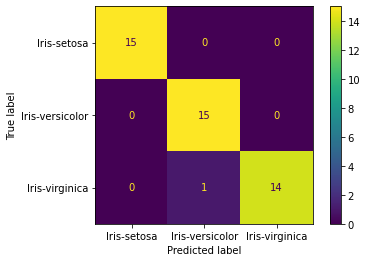

In [93]:
pred = gs_decision_tree.predict(x_test)
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=list(labels.keys()))
cm_display.plot()

## Conculsion 

Scoring 97% on this dataset is a good score when compare with scores published online.
This shows that the decision tree classifier is a good choice for this dataset. When looking at the confusion matrix we see that there is only
one false positive. 